In this notebook, we will attempt to predict the price of diamonds after analysing the effect of different physical variables that influence the price. We will use different regression techniques to model the price and evaluate their performance.


### Importing the libraries and dataset

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('.../diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The dataset contains the prices and other attributes of almost 54,000 diamonds. The columns are as follows:

 - carat weight of the diamond (0.2--5.01)

 - cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

 - color diamond colour, from J (worst) to D (best)

 - clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

 - x length in mm (0--10.74)

 - y width in mm (0--58.9)

 - z depth in mm (0--31.8)

 - depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

 - table width of top of diamond relative to widest point (43--95)

 - price (dependent variable)

 We will use regression methods to model the price according to the different features.

In [0]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df = df.reindex(columns=["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z", "price"])

### EDA

In [9]:
len(df)

53940

In [10]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [11]:
# check for missing values 
df.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x          False
y          False
z          False
price      False
dtype: bool

Let us look at the distribution of the target variable

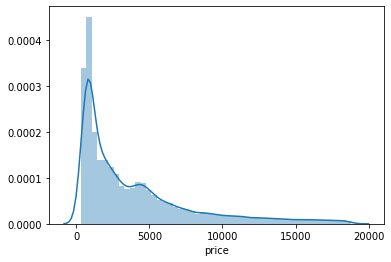

In [12]:
sns.distplot(df['price'])

We see that the target variable is right-skewed. We can take the log transform this variable so that it becomes normally distributed. A normally distributed target variable helps in better modelling the relationship of the target variable with the independent variables.

In [13]:
# Skewness 
print("The skewness of the Price in the dataset is {}".format(df['price'].skew()))

The skewness of the Price in the dataset is 1.618395283383529


Let us now log-transform this variable and see if the distribution can get any more closer to normal 

Skewness: 0.11529585821715065


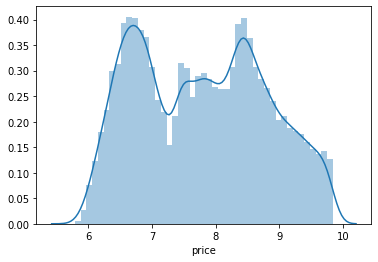

In [14]:
# Transforming the target variable
target = np.log(df['price'])
print("Skewness: {}".format(target.skew()))
sns.distplot(target)

Let us now examine each of the independent variables

#### Carat

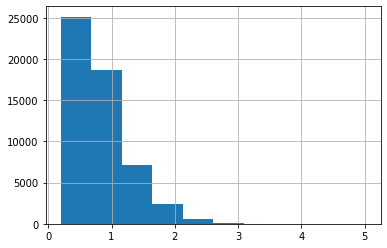

In [15]:
df['carat'].hist()

We see that most of the diamond carats range from 0.2-1.2


#### Cut

In [16]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

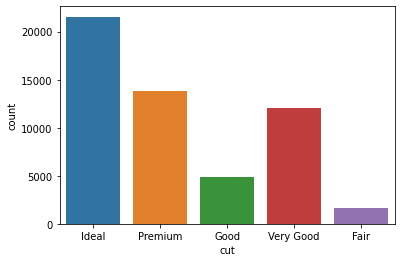

In [17]:
sns.countplot(x='cut', data=df)

We can infer that majority of the cuts are of "Ideal" or "Premium" type, whereas there are very few "Fair" cuts in the data.

#### Color

In [18]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

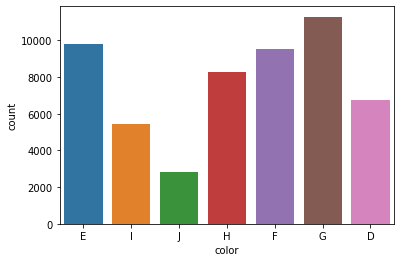

In [19]:
sns.countplot(x='color', data=df)

#### Clarity 

In [20]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

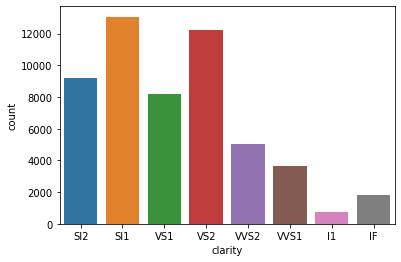

In [21]:
sns.countplot(df['clarity'])

Here, we can infer that most of the diamonds have claritites of 'SI1' or 'VS2'


#### Depth and Table

Text(0.5, 1.0, 'Distribution of table')

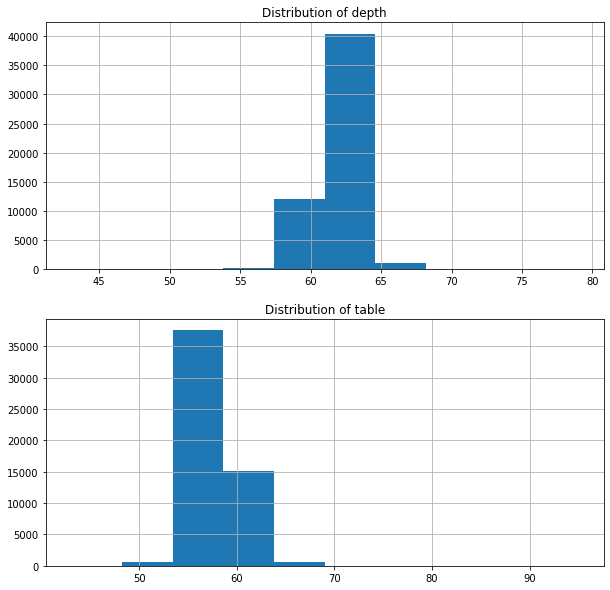

In [22]:
fig, ax = plt.subplots(2, figsize=(10,10))
df['depth'].hist(ax=ax[0])
df['table'].hist(ax=ax[1])
ax[0].set_title("Distribution of depth")
ax[1].set_title("Distribution of table")

#### x,y,z

Text(0.5, 1.0, 'Distribution of z')

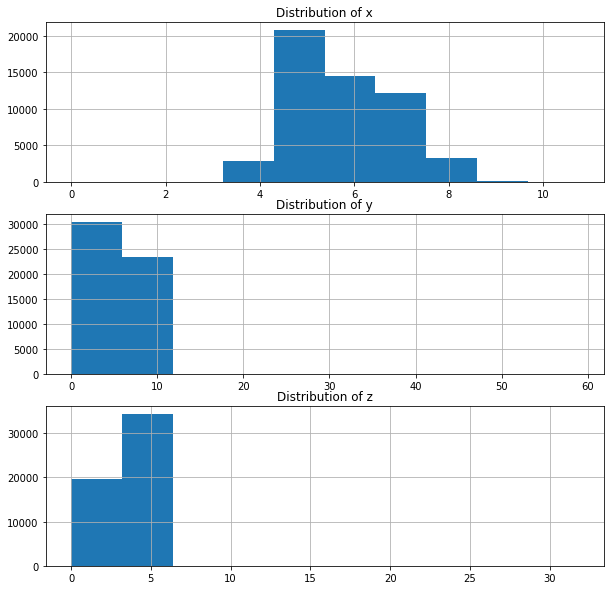

In [23]:
fig, ax = plt.subplots(3, figsize=(10,10))
df['x'].hist(ax=ax[0])
df['y'].hist(ax=ax[1])
df['z'].hist(ax=ax[2])
ax[0].set_title("Distribution of x")
ax[1].set_title("Distribution of y")
ax[2].set_title("Distribution of z")

#### Price

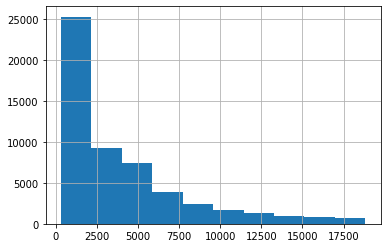

In [24]:
df['price'].hist()

### Feature Selection

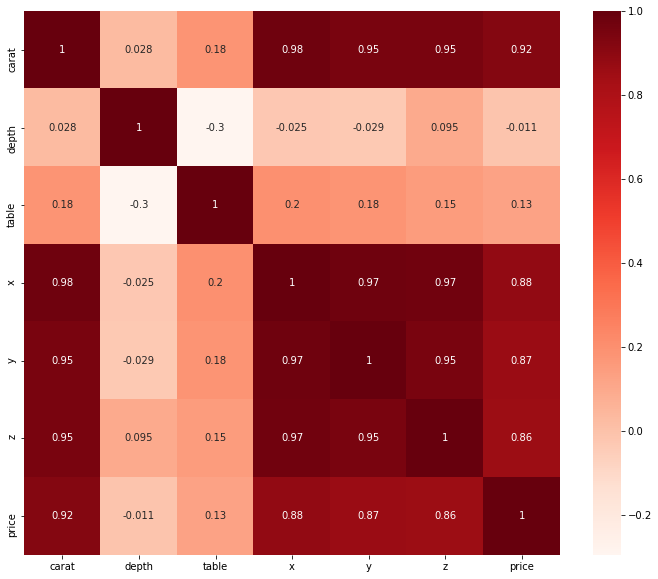

In [25]:
# Using Pearson Correlation 
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

In [26]:
# correlation with output variable 
cor_target = abs(cor["price"])

# Selecting highly correlated features 
relevent_features = cor_target[cor_target>0.5]
relevent_features

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
price    1.000000
Name: price, dtype: float64

In [0]:
df.drop(['depth', 'table'], axis=1, inplace=True)

In [28]:
df.head()

,carat,cut,color,clarity,x,y,z,price
0,0.23,Ideal,E,SI2,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,4.34,4.35,2.75,335


## REGRESSION

In [29]:
# Encoding the categorical data 
# Encoding the independent variables
dummy_cut = pd.get_dummies(df['cut'],drop_first=True)   # drop_first to avoid the dummy variable trap
df = pd.concat([df, dummy_cut], axis=1)
df = df.drop('cut',axis=1)
df.head()

,carat,color,clarity,x,y,z,price,Good,Ideal,Premium,Very Good
0,0.23,E,SI2,3.95,3.98,2.43,326,0,1,0,0
1,0.21,E,SI1,3.89,3.84,2.31,326,0,0,1,0
2,0.23,E,VS1,4.05,4.07,2.31,327,1,0,0,0
3,0.29,I,VS2,4.20,4.23,2.63,334,0,0,1,0
4,0.31,J,SI2,4.34,4.35,2.75,335,1,0,0,0


In [30]:
dummy_color = pd.get_dummies(df['color'], drop_first=True)   
df = pd.concat([df, dummy_color], axis=1)
df = df.drop('color',axis=1)
df.head()

,carat,clarity,x,y,z,price,Good,Ideal,Premium,Very Good,E,F,G,H,I,J
0,0.23,SI2,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0
1,0.21,SI1,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0
2,0.23,VS1,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0
3,0.29,VS2,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0
4,0.31,SI2,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1


In [31]:
dummy_clarity = pd.get_dummies(df['clarity'], drop_first=True)
df = pd.concat([df, dummy_clarity], axis=1)
df = df.drop('clarity', axis=1)
df.head()

,carat,x,y,z,price,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


### Splitting the data into training and test sets 

In [32]:
order = df.columns.to_list()
order

['carat',
 'x',
 'y',
 'z',
 'price',
 'Good',
 'Ideal',
 'Premium',
 'Very Good',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'IF',
 'SI1',
 'SI2',
 'VS1',
 'VS2',
 'VVS1',
 'VVS2']

In [0]:
order = ['carat',
 'x',
 'y',
 'z',
 'Good',
 'Ideal',
 'Premium',
 'Very Good',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'IF',
 'SI1',
 'SI2',
 'VS1',
 'VS2',
 'VVS1',
 'VVS2',
  'price']

In [0]:
df = df[order]

In [35]:
df.head()

,carat,x,y,z,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,price
0,0.23,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,326
1,0.21,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,326
2,0.23,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,327
3,0.29,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,334
4,0.31,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,335


In [0]:
X = df.iloc[:,:-1].values
y = df.iloc[:,21].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### Multiple Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score, mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# making predictions
y_pred = regressor.predict(X_test)

In [40]:
y_pred

array([4903.30536831, 7632.23200502, 6110.12189671, ..., 5282.99282238,
       7007.69080162, 2449.11732103])

In [0]:
mlr_score = regressor.score(X_test, y_test)

### Support Vector Regression

In [0]:
from sklearn import preprocessing, svm

X_svm = X.copy()
X_svm = preprocessing.scale(X_svm)

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y, test_size=0.2, random_state=0)


In [43]:
clf = svm.SVR(kernel='linear')
clf.fit(X_svm_train, y_svm_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
svr_score = clf.score(X_svm_test,y_svm_test)

### Decision Tree Regression 

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state=0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [46]:
regressor_dt.predict(X_test)

array([4537., 7109., 5098., ..., 4853., 9691., 1882.])

In [0]:
dt_score = regressor_dt.score(X_test, y_test)

### Random Forest Regression


In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
rf_score = regressor_rf.score(X_test, y_test)

### Best Model

In [50]:
print('Multiple Linear Regression accuracy:', mlr_score)
print('SVR score: ', svr_score)
print('Decision Tree Regression score: ', dt_score)
print('Random Forest Regression score: ', rf_score)

Multiple Linear Regression accuracy: 0.9211007993351881
SVR score:  0.8728854886387856
Decision Tree Regression score:  0.9500345171418986
Random Forest Regression score:  0.9746595518544936


We can conclude that the Random Forest Regression model performed the best with an accuracy of 97.4%